# Linear Regression

This notebook is a an intuitive introduction to the concept of linear regression. Partially based on Chapter 10 in the book [**Statistics** by Freedman, Pisani and Purves](https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728) 

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


## Small example
Suppose we have 9 points on the plane, defined by their $(x,y)$ coordinates

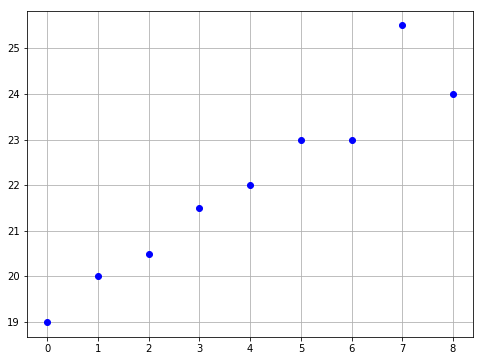

In [2]:
figure(figsize=[8,6])
x = arange(0,9)
y = np.array([[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]]).T
plot(x,y,'bo');
grid()

* These points are close to a straight line trending upwards. We would like to find that line. 

* The line is described by a function of the form: $f_{w_0,w_1}(x) \doteq w_0+w_1 x$

* our goal is to find $w_0$ and $w_1$.

* In a previous notebook we saw how to find a line that passes through 2 points.

* As here we have more than two points the system is **overconstrained** - there is no straight line that passes through all of the points.

* The points do not fall **exactly** on a line.  
So we are looking for $w_0,w_1$  
such that the line is **closest** to the points.

We define the **Square difference** between the line $f_{w_0,w_1}$ and the points
$\langle (x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n) \rangle$ to be 
$$\sum_{i=1}^n [f_{w_0,w_1}(x_i)-y_i]^2$$
(In our example $n=9$)

The values of $w_0,w_1$ which  
minimize the square difference,  
are called the **least squares** solution.

We use matrix notation and `numpy.linalg` to find the optimal vector ${\bf w}=[w_0,w_1]$

${\bf A}$ is an $n$ by $2$ matrix:
$${\bf A} =  \begin{pmatrix}
 1, x_1\\
 \vdots\\
 1, x_n
 \end{pmatrix} 
$$

 ${\bf y}$ and ${\bf w}$ are column vectors:
 $${\bf y} =  \begin{pmatrix}
 y_1\\
 \vdots\\
 y_n
 \end{pmatrix} 
 ,\;\;\;\;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$$

We can then express the differences as a vector ${\bf d}$:
$$ {\bf d} = {\bf A} {\bf w} - {\bf y} $$

The square difference, that we wish to minimize, is equal to the square of the norm of ${\bf d}$. 

Our goal is to find ${\bf w}$ that minimizes  
$\|{\bf d}\|_2^2 = \sum_{i=1}^n d_i^2$

In [3]:
A = array([ ones(9),x ]).T
print ('A=\n',A)
print ('y=\n',y)
A.shape,y.shape 


A=
 [[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]]
y=
 [[ 19. ]
 [ 20. ]
 [ 20.5]
 [ 21.5]
 [ 22. ]
 [ 23. ]
 [ 23. ]
 [ 25.5]
 [ 24. ]]


((9, 2), (9, 1))

In [15]:
# linearly generated sequence
w = linalg.lstsq(A,y)[0] # obtaining the parameters


In [16]:
w[0]

array([ 19.18888889])

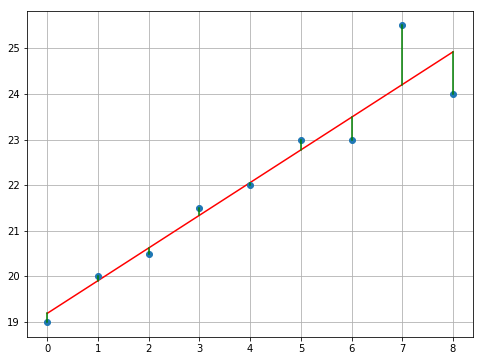

In [17]:
# plotting the line and the square differences
figure(figsize=[8,6])
line = w[0]+w[1]*x # regression line
plot(x,line,'r-',x,y,'o')

for i in range(len(x)):
    plot([x[i],x[i]],[y[i],w[1]*x[i]+w[0]],'g')
grid()

## A real-life example
We now turn our attention to the analysis of some real-word data. This data describes  the weight and height of some 25,000 people.

Weight/Weight data downloaded from [here](https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html)

In [19]:
HW=pd.read_csv('data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [20]:
# Copute some basic descritive statistics.
HW.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [21]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A])
y=np.array(HW['Weight'])
A.shape,y.shape

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w1

array([-82.57574306,   3.08347645])

In [22]:
def f(x,w):
    return w[0]+w[1]*x

In [25]:
f(72,w1)-f(71,w1)

3.0834764454029653

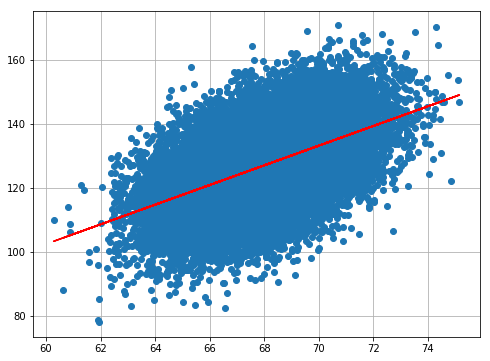

In [28]:
# plotting the line and the square differences
x = np.array(HW['Height'])
y = np.array(HW['Weight'])
figure(figsize=[8,6])
line = w1[0]+w1[1]*x # regression line
plot(x,y,'o',x,line,'r-')

#for i in range(len(x)):
#    plot([x[i],x[i]],[y[i],w[1]*x[i]+w[0]],'g')
grid()